Adjusted Rand Index (k=3): 0.701


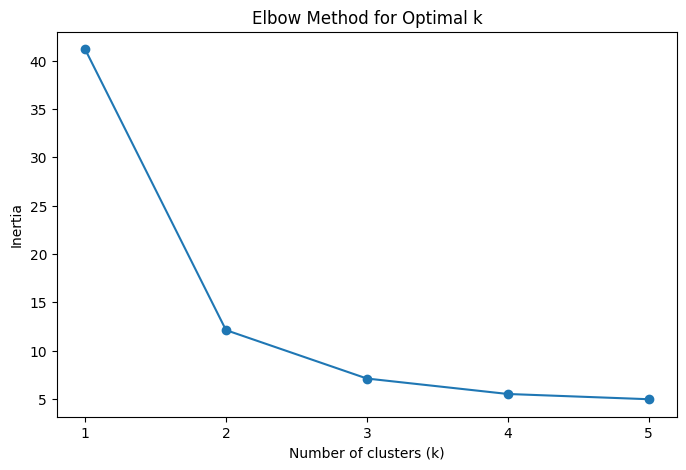

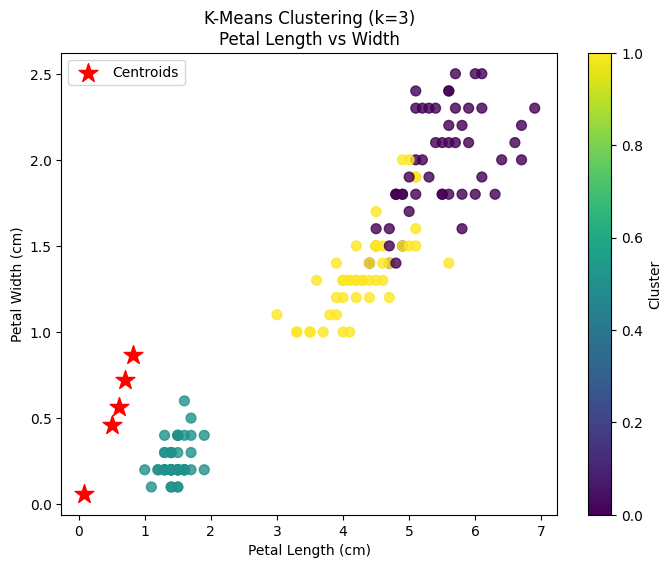

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Load and preprocess Iris data directly
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Preprocessing (same as Task 1)
scaler = MinMaxScaler()
features = iris.feature_names
X = iris_df[features]
y_true = iris_df['species']
X_scaled = scaler.fit_transform(X)  # Normalize features

# 2. K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Calculate ARI
ari_score = adjusted_rand_score(y_true, clusters)
print(f"Adjusted Rand Index (k=3): {ari_score:.3f}")

# 3. Elbow method
inertias = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 6))
plt.savefig('elbow_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Cluster visualization
plt.figure(figsize=(8, 6))
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], 
            c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            marker='*', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering (k=3)\nPetal Length vs Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Cluster')
plt.legend()
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()